In [492]:
!python -m pip install --upgrade --user pip
print("Done")

Done


In [493]:
!pip install scikit-learn --upgrade --user
!pip install scipy --upgrade --user
!pip install xgboost --upgrade --user
!pip install imblearn --upgrade --user
!pip install seaborn --upgrade --user
!pip install -U imbalanced-learn
print("DONE")

DONE


In [1033]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from warnings import filterwarnings 
import imblearn
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from datetime import date
import math 

## I. Data Exploration

### a) Information of the given dataset

In this section we found there are features with null values

In [1199]:
# Merging csv files
df = pd.concat(map(pd.read_csv, ['data_01.csv', 'data_02.csv', 'data_03.csv', 'data_04.csv','data_05.csv', 
                                 'data_06.csv', 'data_07.csv', 'data_08.csv', 'data_09.csv', 'data_010.csv',
                                 'data_011.csv', 'data_012.csv', 'data_013.csv', 'data_014.csv', 'data_015.csv']), 
               ignore_index=True)

# Information of our Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       5490 non-null   object 
 1   T_AMB      5490 non-null   float64
 2   P_AMB      5490 non-null   float64
 3   CMP_SPEED  5490 non-null   float64
 4   CDP        5490 non-null   float64
 5   GGDP       5490 non-null   float64
 6   HPT_IT     4337 non-null   float64
 7   CDT        5490 non-null   float64
 8   LPT_IT     4337 non-null   float64
 9   EXH_T      4337 non-null   float64
 10  RH         5490 non-null   float64
 11  WAR        5490 non-null   float64
 12  POWER      4337 non-null   float64
dtypes: float64(12), object(1)
memory usage: 557.7+ KB


### b) Basic Statistical indicators of the Features and Target

In [1200]:
# Basic statistical indicators
df.describe()

,T_AMB,P_AMB,CMP_SPEED,CDP,GGDP,HPT_IT,CDT,LPT_IT,EXH_T,RH,WAR,POWER
count,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,4337.000000,5490.000000,4337.000000,4337.000000,5490.000000,5490.000000,4337.000000
mean,20.374075,0.978334,6417.889466,6.265058,2.323811,1182.098329,264.603400,860.669054,612.324913,53.384380,0.000082,11730.214760
std,11.537110,0.045696,3793.082652,3.616029,0.855249,118.879552,139.592527,143.582893,156.132793,23.805401,0.000042,3991.630810
min,-15.949900,0.843017,0.000000,0.843212,0.843212,878.785407,-15.931453,563.748217,332.933559,10.347066,0.000009,2720.133922
25%,17.643511,0.949028,4499.382563,3.137928,1.690245,1106.295284,207.557754,762.233458,503.424955,34.734872,0.000053,8185.832753
50%,23.483962,0.998246,7823.908803,6.674973,2.552753,1157.928077,334.796915,817.487211,554.500718,52.064385,0.000075,13473.368134
75%,28.726957,1.011399,9658.852062,9.616167,3.072413,1253.712362,367.034811,945.347814,705.181564,74.496531,0.000121,14972.032226
max,32.858068,1.018659,10000.000000,12.390310,3.518858,1600.690748,406.806058,1381.847685,1188.563234,100.000000,0.000156,17616.227967


### c) Frequency distribution of the dependent variable POWER

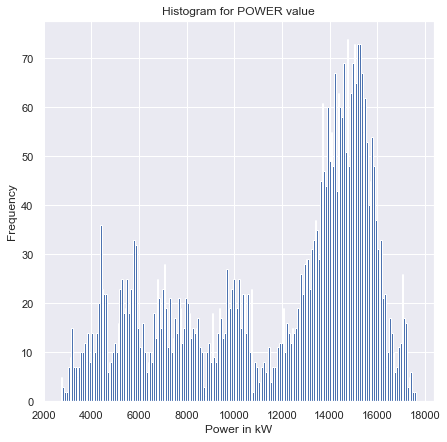

In [1201]:
# Plot Histogram on x
# df = df.fillna(0)
plt.figure(figsize=(7,7))
plt.title('Histogram for POWER value')
plt.xlabel('Power in kW')
plt.ylabel('Frequency')
plt.hist(df.POWER, bins=200)
plt.show()

## II. Data Cleasing and Feature Engineering

Based on section I.a we can see the there are the same amount of NA values in columns HPT_IT, LPT_IT, EXH_T and POWER. 
We visualize a part of this data to get a conclusion.







In [1202]:
df[df.isna().any(axis=1)]



,date,T_AMB,P_AMB,CMP_SPEED,CDP,GGDP,HPT_IT,CDT,LPT_IT,EXH_T,RH,WAR,POWER
0,2021-01-01,1.450440,0.843522,0.0,0.843522,0.843522,NaN,1.450440,NaN,NaN,81.237441,0.000041,NaN
44,2021-02-14,9.082138,0.843767,0.0,0.843767,0.843767,NaN,9.082138,NaN,NaN,47.864929,0.000040,NaN
45,2021-02-15,14.020675,0.843930,0.0,0.843930,0.843930,NaN,14.020675,NaN,NaN,34.667287,0.000041,NaN
46,2021-02-16,12.602537,0.843365,0.0,0.843365,0.843365,NaN,12.602537,NaN,NaN,37.738649,0.000040,NaN
47,2021-02-17,6.172032,0.844004,0.0,0.844004,0.844004,NaN,6.172032,NaN,NaN,58.581538,0.000040,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,2021-10-27,25.945341,1.006381,0.0,1.006381,1.006381,NaN,25.945341,NaN,NaN,74.270689,0.000153,NaN
5486,2021-12-29,28.826326,1.006450,0.0,1.006450,1.006450,NaN,28.826326,NaN,NaN,62.004601,0.000151,NaN
5487,2021-12-30,31.811188,1.005989,0.0,1.005989,1.005989,NaN,31.811188,NaN,NaN,51.717477,0.000151,NaN
5488,2021-12-31,30.411757,1.006530,0.0,1.006530,1.006530,NaN,30.411757,NaN,NaN,56.456168,0.000151,NaN


We found a strict correlation that when POWER has a NaN value the other mentioned features does so. 

### a) Imputation
We opt to replace NA values with 0s.

In [1204]:
df = df.fillna(0)

df.head()

,date,T_AMB,P_AMB,CMP_SPEED,CDP,GGDP,HPT_IT,CDT,LPT_IT,EXH_T,RH,WAR,POWER
0,2021-01-01,1.450440,0.843522,0.000000,0.843522,0.843522,0.000000,1.450440,0.000000,0.000000,81.237441,0.000041,0.000000
1,2021-01-02,2.761142,0.843856,7870.729713,7.907587,2.448490,949.263690,258.933367,625.677722,387.749872,74.311313,0.000041,13332.692409
2,2021-01-03,9.270325,0.843413,9898.625866,9.407523,2.816769,984.601577,338.014765,655.857137,413.039467,47.897182,0.000041,13026.684965
3,2021-01-04,14.293265,0.844249,9850.791469,9.121784,2.775070,1014.536922,347.129100,681.701087,434.895488,34.400729,0.000041,12773.507042
4,2021-01-05,12.875213,0.843663,9828.508458,9.138088,2.776577,1008.503746,344.360211,677.018748,431.268990,37.537882,0.000041,12768.092781


### b) Date extraction
In order to make a correlation of given dates we transform the string value of date to numeric mothn and day.

In [1206]:
#Transform string to date
df['date'] = pd.to_datetime(df.date, format="%Y-%m-%d")

#Extracting Month
df.insert(1, 'MONTH', df['date'].dt.month)

#Extracting Day
df.insert(2, 'DAY', df['date'].dt.month)

df.drop(columns=['date'], inplace=True)
df.head()

,MONTH,DAY,T_AMB,P_AMB,CMP_SPEED,CDP,GGDP,HPT_IT,CDT,LPT_IT,EXH_T,RH,WAR,POWER
0,1,1,1.450440,0.843522,0.000000,0.843522,0.843522,0.000000,1.450440,0.000000,0.000000,81.237441,0.000041,0.000000
1,1,1,2.761142,0.843856,7870.729713,7.907587,2.448490,949.263690,258.933367,625.677722,387.749872,74.311313,0.000041,13332.692409
2,1,1,9.270325,0.843413,9898.625866,9.407523,2.816769,984.601577,338.014765,655.857137,413.039467,47.897182,0.000041,13026.684965
3,1,1,14.293265,0.844249,9850.791469,9.121784,2.775070,1014.536922,347.129100,681.701087,434.895488,34.400729,0.000041,12773.507042
4,1,1,12.875213,0.843663,9828.508458,9.138088,2.776577,1008.503746,344.360211,677.018748,431.268990,37.537882,0.000041,12768.092781


### c) Feature selection

#### 1. Correlation of variables

<AxesSubplot:>

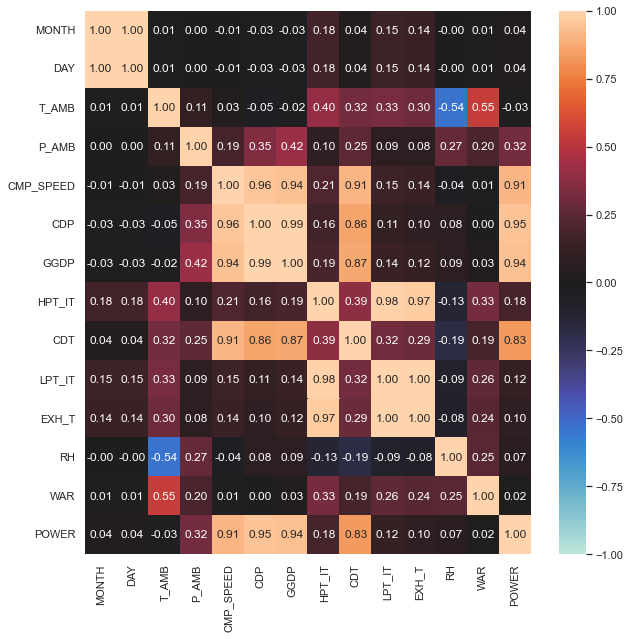

In [1207]:
corr = df.corr(method='spearman')
# Create graphical matrix of correlations
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot=True, fmt=".2f", vmax=1, vmin=-1, center=0)

#### 2. Correlation justification

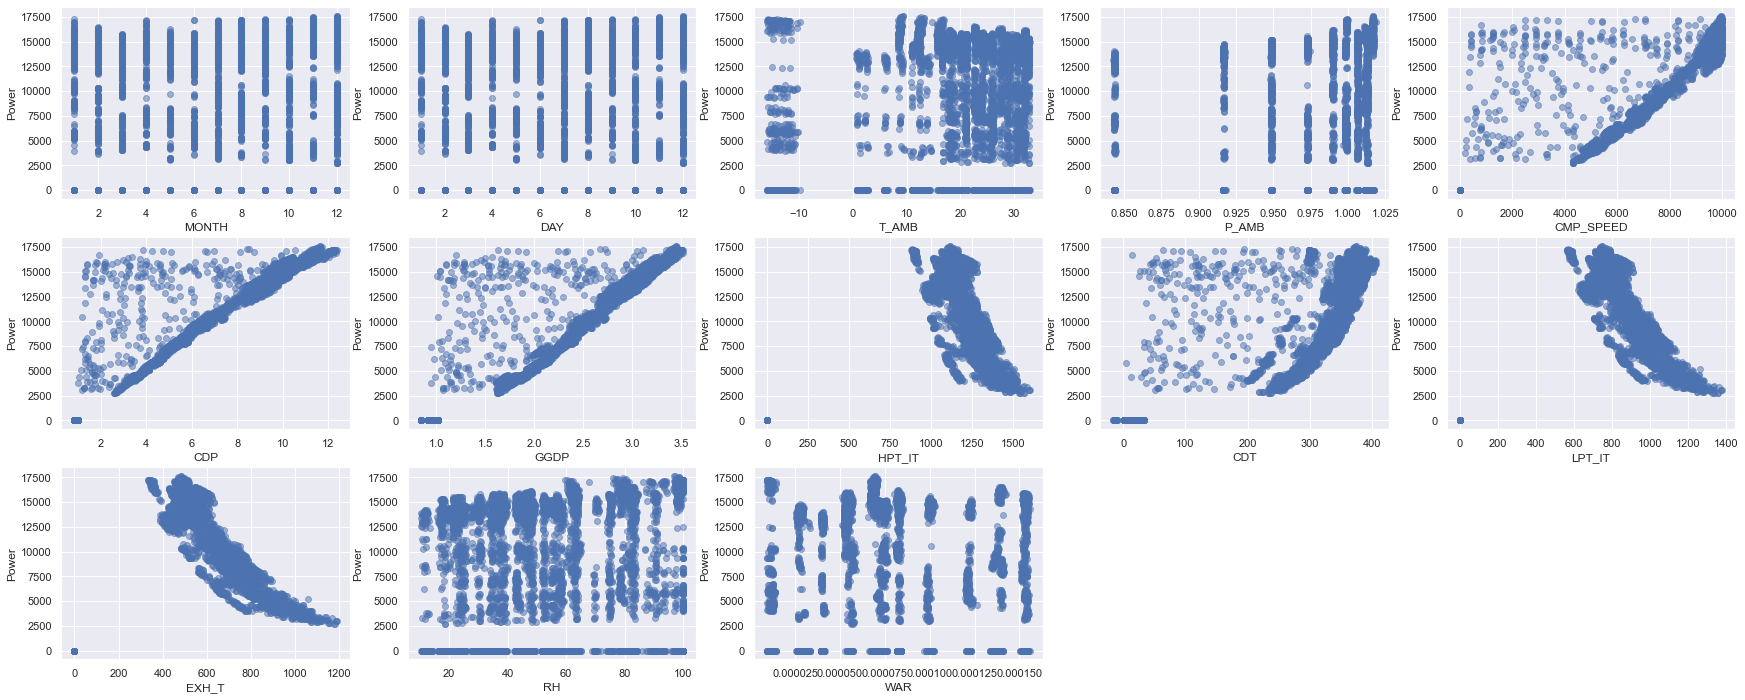

In [1208]:
plt.figure(figsize=(30,12))
index=1
for i in df.iloc[:,0:-1]:
  plt.subplot(3,5,index)
  plt.xlabel(i)
  plt.ylabel('Power')
  plt.scatter(df[i], df['POWER'],  alpha=0.5, label='Data points')
  index+=1


#### 3. Feature split / dropping

In [1209]:
df.drop(columns=['MONTH', 'DAY', 'WAR', 'T_AMB', 'RH'], inplace=True)
df.head()

,P_AMB,CMP_SPEED,CDP,GGDP,HPT_IT,CDT,LPT_IT,EXH_T,POWER
0,0.843522,0.000000,0.843522,0.843522,0.000000,1.450440,0.000000,0.000000,0.000000
1,0.843856,7870.729713,7.907587,2.448490,949.263690,258.933367,625.677722,387.749872,13332.692409
2,0.843413,9898.625866,9.407523,2.816769,984.601577,338.014765,655.857137,413.039467,13026.684965
3,0.844249,9850.791469,9.121784,2.775070,1014.536922,347.129100,681.701087,434.895488,12773.507042
4,0.843663,9828.508458,9.138088,2.776577,1008.503746,344.360211,677.018748,431.268990,12768.092781


### f) Data partitioning

In [1210]:
features = df[['P_AMB','CMP_SPEED', 'CDP', 'GGDP', 'HPT_IT',
                        'CDT', 'LPT_IT', 'EXH_T']]
target = df['POWER']

In [1214]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=134)

### f) Data transformation


In [1215]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## III. Model Selection and Comparation

In this process we are going to compere the performance of different models for regression, especifically the Learning Curves and the R2 score.

### Random Forest

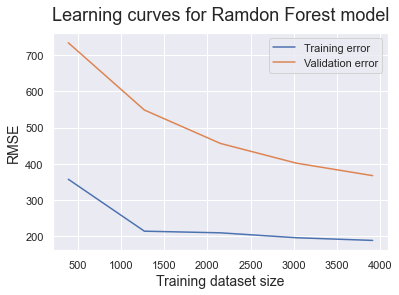

In [1213]:
# Modules imoprtation
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve

# RandomForest instance creation
reg = RandomForestRegressor(n_estimators=10, max_depth=10, min_samples_split=4, random_state=0)
# Running of learning curve function
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(reg, X_train, y_train, cv=20, 
                                                                      scoring = 'neg_mean_squared_error', return_times=True)
# Learning Cureve plot creation
plt.plot(train_sizes,(np.sqrt(np.mean(train_scores,axis=1) * -1)), label = 'Training error')
plt.plot(train_sizes,(np.sqrt(np.mean(test_scores,axis=1) * -1)), label = 'Validation error')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training dataset size', fontsize = 14)
plt.yscale('linear')
plt.ticklabel_format(style='plain')
plt.title('Learning curves for Ramdon Forest model', fontsize = 18, y = 1.03)
plt.legend()

In [769]:
reg.fit(X_train, y_train)
#R2 score computing
reg.score(X_test, y_test)

0.9949148098811249

### Linear Regression

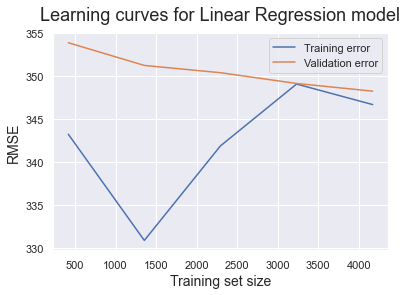

In [770]:
# Modules imoprtation
from sklearn.linear_model import LinearRegression

# RandomForest instance creation
reg = LinearRegression()
# Running of learning curve function
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(reg, X_train, y_train, cv=20, 
                                                                      scoring = 'neg_mean_squared_error', return_times=True)
# Learning Cureve plot creation
plt.plot(train_sizes,(np.sqrt(np.mean(train_scores,axis=1) * -1)), label = 'Training error')
plt.plot(train_sizes,(np.sqrt(np.mean(test_scores,axis=1) * -1)), label = 'Validation error')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Linear Regression model', fontsize = 18, y = 1.03)
plt.legend()

In [772]:
reg.fit(X_train, y_train)
#R2 score computing
reg.score(X_test, y_test)

0.9963844857894308

### Neural Network

C:\Users\Luis\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luis\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luis\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luis\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

C:\Users\Luis\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luis\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luis\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luis\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

C:\Users\Luis\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luis\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luis\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luis\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

C:\Users\Luis\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


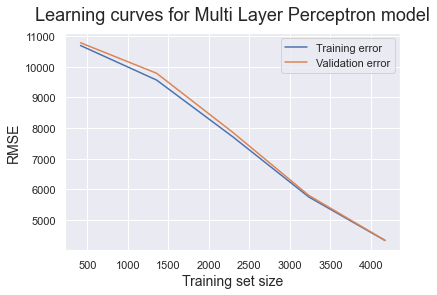

In [773]:
from sklearn.neural_network import MLPRegressor

reg = MLPRegressor()#random_state=1)# max_iter=5000)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(reg, X_train, y_train, cv=20, 
                                                                      scoring = 'neg_mean_squared_error', return_times=True)

plt.plot(train_sizes,(np.sqrt(np.mean(train_scores,axis=1) * -1)), label = 'Training error')
plt.plot(train_sizes,(np.sqrt(np.mean(test_scores,axis=1) * -1)), label = 'Validation error')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Multi Layer Perceptron model', fontsize = 18, y = 1.03)
plt.legend()

In [805]:
reg.fit(X_train, y_train)
#R2 score computing
reg.score(X_test, y_test)

C:\Users\Luis\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5369346333196638

## IV. Selected Model Evaluation

### Training

In [1216]:
dtreg = LinearRegression().fit(X_train, y_train)

#dtreg = RandomForestRegressor() # n_estimators=10, max_depth=10, min_samples_split=4, random_state=0)
print("DONE")

DONE


### Validation results

R2 score

In [1217]:
dtreg.score(X_test, y_test)

0.9963844857894308

RMSE

In [1218]:
y_pred = dtreg.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

362.1607993369553


### Testing

In [1221]:
# Testing Data preparation 
df_real_test = pd.read_csv('test_data_123.csv')
df_real_test_original = pd.read_csv('test_data_123.csv')
df_real_test_original.drop(columns=['WAR','T_AMB', 'RH'], inplace=True)

df_real_test = df_real_test_original.fillna(0)
df_real_test.drop(columns=['date'], inplace=True)

df_real_test = scaler.transform(df_real_test)

We now save the predictions in csv

In [1222]:
y_pred = dtreg.predict(df_real_test)
result = pd.DataFrame(y_pred, columns=['POWER'], index = df_real_test_original.date)

result.index = pd.to_datetime(result.index, format = '%Y-%m-%d')
result.index = result.index.strftime('%#m/%#d/%Y')  #On Windows use #, linues/OS X use -

result.to_csv('results', index=True)

## V. Conclusion

Based on the KPIs of performance we can select Linear Regression as the best ffi for this assigment.